<a href="https://colab.research.google.com/github/charlie-aashutosh/IIT-JODHPUR-AI-/blob/main/Transfer_Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 257MB/s]
100% 1.06G/1.06G [00:04<00:00, 271MB/s]


In [2]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16 #pretrained on ImageNET dataset

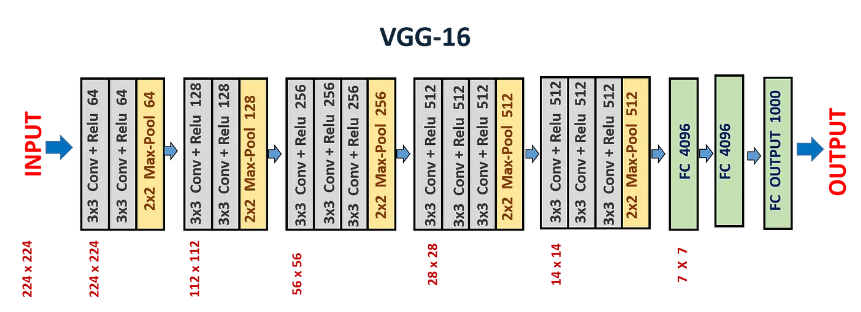

In [4]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False, #no need to take the FC layers because we will customize it as per our need
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
conv_base.trainable=False #no need to train the conv_base extracted from VGG 16 because it is already pre trained

In [7]:
#Generator

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    image_size=(150,150),
    batch_size=32
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    image_size=(150,150),
    batch_size=32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def normalize(image,label):
  image=tf.cast(image/255., tf.float32)
  return image, label

In [10]:
train_ds=train_ds.map(normalize)
validation_ds=validation_ds.map(normalize)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 61s 84ms/step - loss: 0.2686 - accuracy: 0.8881 - val_loss: 0.2110 - val_accuracy: 0.9096
Epoch 2/5
625/625 [==============================] - 65s 104ms/step - loss: 0.1862 - accuracy: 0.9229 - val_loss: 0.2096 - val_accuracy: 0.9090
Epoch 3/5
625/625 [==============================] - 66s 105ms/step - loss: 0.1598 - accuracy: 0.9332 - val_loss: 0.2085 - val_accuracy: 0.9142
Epoch 4/5
625/625 [==============================] - 65s 104ms/step - loss: 0.1259 - accuracy: 0.9495 - val_loss: 0.2218 - val_accuracy: 0.9132
Epoch 5/5
625/625 [==============================] - 56s 89ms/step - loss: 0.1113 - accuracy: 0.9538 - val_loss: 0.2412 - val_accuracy: 0.9142
